In [ ]:
# Import Libraries and Load the Data
### First, import the necessary libraries and load the dataset into a pandas DataFrame.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # For visualizing data.
%matplotlib inline
import datetime

# Merge data between MyUSA Bank and S&P500(SPX) 
### Rename column

In [40]:
# Load the bank data
#df = pd.read_csv('../data/myusabank.csv')
#df['Date'] = pd.to_datetime(df['Date'])

# Load the S&P 500 data
#spx_df = pd.read_csv('../data/S&P 500 (SPX)HistoricalData_1730734525504.csv')
#spx_df['Date'] = pd.to_datetime(spx_df['Date'])

# Define the date range
#start_date = '2022-01-03'
#end_date = '2023-03-23'

# Filter both dataframes based on the date range
#bank_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)][['Date', 'Stock_Price']]
#spx_df_filtered = spx_df[(spx_df['Date'] >= start_date) & (spx_df['Date'] <= end_date)][['Date', 'Close/Last']]

# Rename columns for clarity
#bank_df = bank_df.rename(columns={'Stock_Price': 'Bank_Stock_Price'})
#spx_df_filtered = spx_df_filtered.rename(columns={'Close/Last': 'S&P500'})


# Merge the dataframes on 'Date'
#merged_df = pd.merge(bank_df, spx_df_filtered, on='Date', how='inner')

# Display the first few rows of the merged data
#merged_df.head()


# Load the Bank Data

In [55]:
df = pd.read_csv('../data/myusabank.csv')
df['Date'] = pd.to_datetime(df['Date'])

Details: Load data for a bank's stock prices from a CSV file. Reads a CSV file (myusabank.csv) containing bank financial data into a DataFrame named df and converts the Date column from a string format to a datetime object. This makes it easier to filter data based on dates later in the code.

#  Load the S&P 500 Data

In [56]:
spx_df = pd.read_csv('../data/S&P 500 (SPX)HistoricalData_1730734525504.csv')
spx_df['Date'] = pd.to_datetime(spx_df['Date'])

Details: Load historical S&P 500 data for comparison with the bank's stock prices. Reads another CSV file (S&P 500 historical data) into a DataFrame named spx_df. It converts the Date column to a datetime object for easy filtering by date range.

# Define the Date Range for Analysis

In [57]:
start_date = '2022-01-03'
end_date = '2023-03-23'

Details: Set the start and end dates for the data range of interest and it assigns two specific dates that act as filters, allowing you to focus on data from early 2022 through early 2023.

# Filter Both DataFrames Based on the Date Range

In [58]:
bank_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)][['Date', 'Stock_Price']]
spx_df_filtered = spx_df[(spx_df['Date'] >= start_date) & (spx_df['Date'] <= end_date)][['Date', 'Close/Last']]

Purpose: Isolate the relevant rows in both the bank and S&P 500 DataFrames based on the specified date range.
Details:
    Filters the df DataFrame (bank data) for rows where the Date falls within the date range, and selects only the Date and Stock_Price columns.
    Similarly, filters the spx_df DataFrame (S&P 500 data) for dates within the range and selects the Date and Close/Last columns.

# Rename Columns for Clarity

In [59]:
bank_df = bank_df.rename(columns={'Stock_Price': 'Bank_Stock_Price'})
spx_df_filtered = spx_df_filtered.rename(columns={'Close/Last': 'S&P500'})

Details: Make column names clearer in both DataFrames and renames Stock_Price in bank_df to Bank_Stock_Price, helping distinguish it from the S&P 500 data, renames Close/Last in spx_df_filtered to S&P500, making it clear that this column contains S&P 500 closing prices.

# Merge the DataFrames on the 'Date' Column

In [60]:
merged_df = pd.merge(bank_df, spx_df_filtered, on='Date', how='inner')

Purpose: Combine the bank and S&P 500 data into a single DataFrame based on matching dates.
Details:
    Uses an inner join to merge bank_df and spx_df_filtered on the Date column.
    The how='inner' parameter ensures that only rows with dates present in both data sets are included.

# Display the First Few Rows of the Merged Data

In [61]:
merged_df.head()

,Date,Bank_Stock_Price,S&P500
0,2022-01-03,128,4796.56
1,2022-01-04,63,4793.54
2,2022-01-05,196,4700.58
3,2022-01-06,177,4696.05
4,2022-01-07,103,4677.03


Details: Inspect the initial rows of the merged data and head() displays the first few rows, allowing you to verify that the merge worked correctly and that the columns (Date, Bank_Stock_Price, and S&P500) contain the expected data.

In [62]:
merged_df.tail()

,Date,Bank_Stock_Price,S&P500
316,2023-03-03,169,4045.64
317,2022-08-23,53,4128.73
318,2022-05-04,123,4300.17
319,2023-01-18,142,3928.86
320,2023-03-23,106,3948.72


Details: Inspect the initial rows of the merged data and tail() displays the first few rows, allowing you to verify that the merge worked correctly and that the columns (Date, Bank_Stock_Price, and S&P500) contain the expected data.

### Check the  description

In [63]:
merged_df.describe()

,Date,Bank_Stock_Price,S&P500
count,321,321.000000,321.000000
mean,2022-08-13 12:47:06.168224256,125.467290,4082.772897
min,2022-01-03 00:00:00,51.000000,3577.030000
25%,2022-04-22 00:00:00,92.000000,3899.380000
50%,2022-08-15 00:00:00,123.000000,4016.220000
75%,2022-12-02 00:00:00,160.000000,4277.880000
max,2023-03-23 00:00:00,199.000000,4796.560000
std,NaN,41.510914,269.775065


Details: Inspect the  merged data  description displays the count, mean, min max and std  to verify that the merge worked correctly and that the columns (Date, Bank_Stock_Price, and S&P500) contain the expected data.

# Visualizations and Exploratory Data Analysis (EDA)

## Plot the Bank Stock Price and S&P 500 on the same figure

### Plotting the Data 
Use matplotlib and seaborn to create a line plot that shows both the bank's stock price and the S&P 500 index over time. This gives a visual representation of how the two move together or differ over the period.

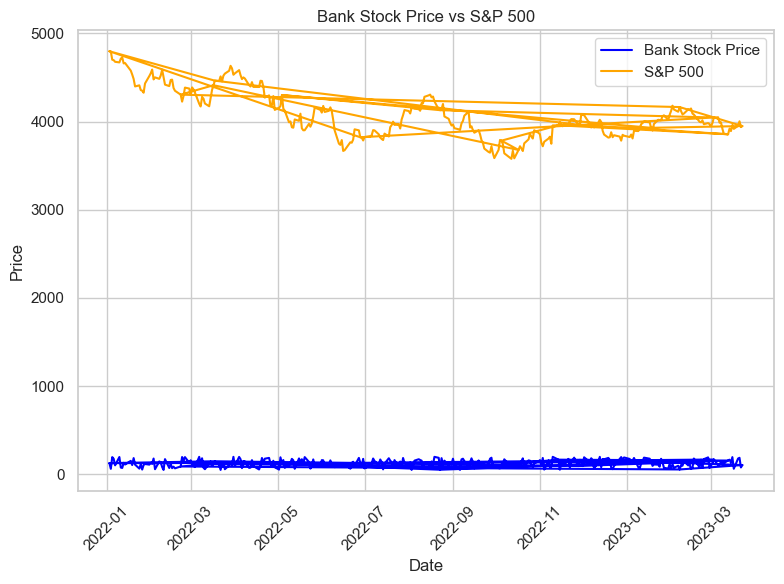

In [64]:
sns.set_style = ("whitegrid") # Set the plot style for better aesthetics
plt.figure(figsize=(8, 6)) # Initialize the figure and size
plt.plot(merged_df['Date'], merged_df['Bank_Stock_Price'], label='Bank Stock Price', color='blue')
plt.plot(merged_df['Date'], merged_df['S&P500'], label='S&P 500', color='orange')
plt.title("Bank Stock Price vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend() # Add a legend to distinguish the lines
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Use tight layout for better spacing
plt.show() # Display the plot

This code plots Bank_Stock_Price and S&P500 on the same graph, with distinct colors and a legend to differentiate them.

# Calculating Correlation Coefficients

A correlation coefficient will indicate the degree to which the bank's stock price moves in relation to the S&P 500 index. Correlation values range from -1 (perfect inverse correlation) to +1 (perfect positive correlation).

In [65]:
# Calculate the correlation between Bank Stock Price and S&P 500
correlation = merged_df['Bank_Stock_Price'].corr(merged_df['S&P500'])

# Print the correlation
print(f"Correlation between Bank Stock Price and S&P 500: {correlation:.2f}")

Correlation between Bank Stock Price and S&P 500: -0.06


This code calculates the Pearson correlation coefficient between the bank stock prices and S&P 500 data and A result show  close to -1 indicates a strong negative correlation (they move inversely).


### Plot the Data Correlation Coefficients

Now, plot the bank’s stock prices and the S&P 500 index on the same chart. This will help visualize how the two datasets move over the selected date range.

In [48]:
#sns.set_style = ("whitegrid")
#plt.figure(figsize=(10, 6))
#plt.plot(merged_df['Date'], merged_df['Bank_Stock_Price'], label='Bank Stock Price', color='blue')
#plt.plot(merged_df['Date'], merged_df['S&P500'], label='S&P 500', color='orange')
#plt.title("Bank Stock Price vs S&P 500")
#plt.xlabel("Date")
#plt.ylabel("Price")
#plt.legend()  # Add a legend to distinguish the lines
#plt.xticks(rotation=45) # Rotate x-axis labels for better readability
#plt.tight_layout() # Use tight layout for better spacing
#plt.show() # Display the plot

# Analyzing Trends

To analyze trends and calculate rolling averages or plot percentage changes to see how the bank's stock price compares with the overall market trend.

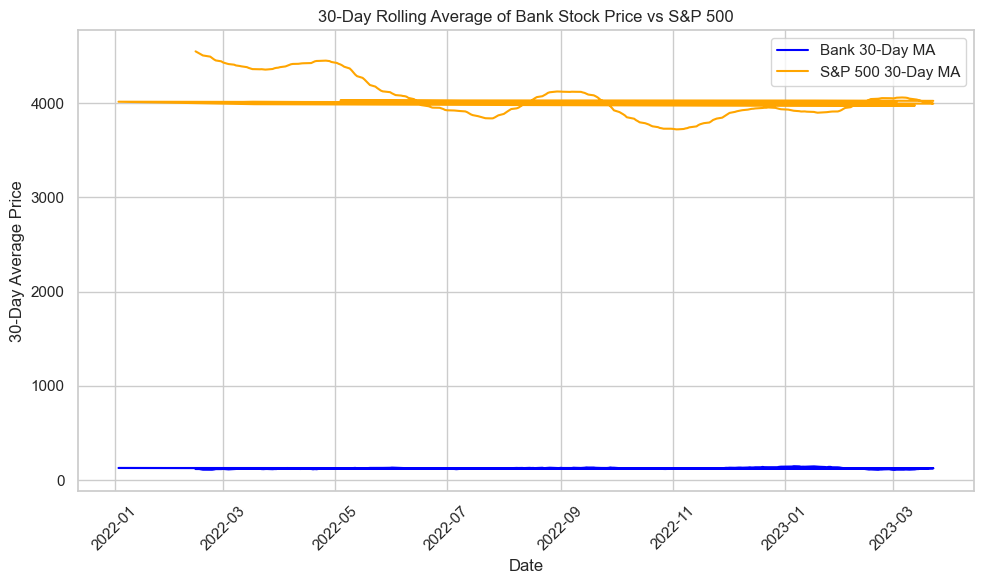

In [66]:
# Calculate the 30-day rolling averages
merged_df['Bank_30Day_MA'] = merged_df['Bank_Stock_Price'].rolling(window=30).mean()
merged_df['SP500_30Day_MA'] = merged_df['S&P500'].rolling(window=30).mean()
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Bank_30Day_MA'], label='Bank 30-Day MA', color='blue')
plt.plot(merged_df['Date'], merged_df['SP500_30Day_MA'], label='S&P 500 30-Day MA', color='orange')
plt.title("30-Day Rolling Average of Bank Stock Price vs S&P 500")
plt.xlabel("Date")
plt.ylabel("30-Day Average Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Rolling averages can smooth out daily fluctuations and highlight broader trends.

## Daily Percentage Change

Percentage change can help to compare the volatility of the bank’s stock price against the S&P 500.

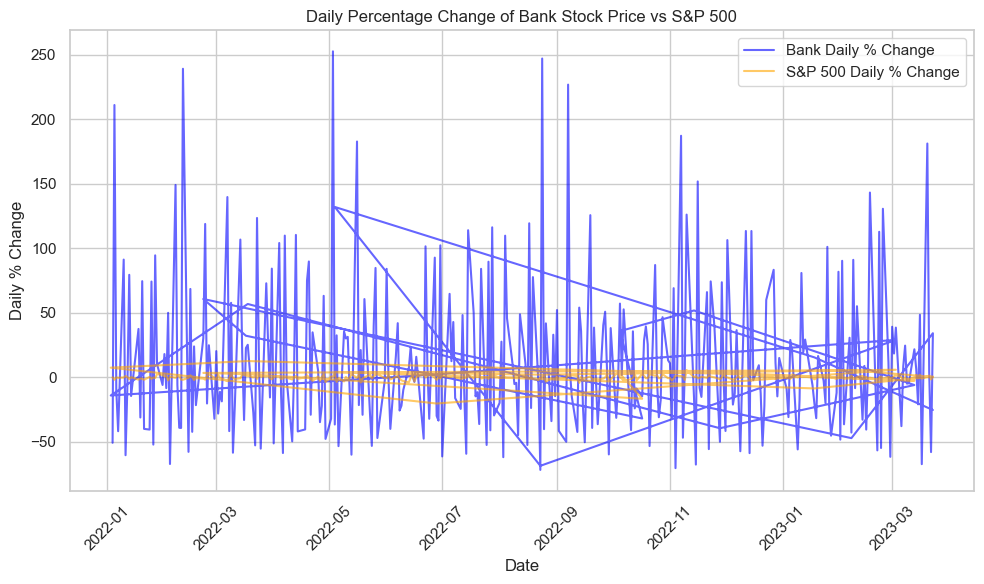

In [67]:
# Calculate daily percentage change
merged_df['Bank_Daily_Change'] = merged_df['Bank_Stock_Price'].pct_change() * 100
merged_df['SP500_Daily_Change'] = merged_df['S&P500'].pct_change() * 100

# Plot daily percentage changes
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Bank_Daily_Change'], label='Bank Daily % Change', color='blue', alpha=0.6)
plt.plot(merged_df['Date'], merged_df['SP500_Daily_Change'], label='S&P 500 Daily % Change', color='orange', alpha=0.6)

# Add title and labels
plt.title("Daily Percentage Change of Bank Stock Price vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


# Calculating Key Performance Indicators (KPIs)

To calculate the standard deviation and beta of the bank's stock relative to the S&P 500. These metrics provide insights into the volatility and sensitivity of the bank's stock price in relation to the S&P 500.

# Calculate Standard Deviation

The standard deviation measures the volatility of the stock prices, showing how much the bank's stock price fluctuates around its average (mean) value.

### Calculate the standard deviation of Bank Stock Price and S&P 500

In [49]:
bank_std_dev = merged_df['Bank_Stock_Price'].std()
sp500_std_dev = merged_df['S&P500'].std()
# Print the results
print(f"Standard Deviation of Bank Stock Price: {bank_std_dev:.2f}")
print(f"Standard Deviation of S&P 500: {sp500_std_dev:.2f}")


Standard Deviation of Bank Stock Price: 41.51
Standard Deviation of S&P 500: 269.78


Explanation:
    merged_df['Bank_Stock_Price'].std(): This calculates the standard deviation of the Myusabank’s stock price.
    merged_df['S&P500'].std(): This calculates the standard deviation of the S&P500(SPX).
    Interpretation:
        A higher standard deviation indicates more volatility, meaning the prices vary widely from the mean.
        A lower standard deviation implies the prices are relatively stable around the mean.

# Calculate Beta

Beta measures the sensitivity of the bank’s stock returns to the S&P 500’s returns. A beta value can be interpreted as follows:
    Beta > 1: The stock is more volatile than the S&P 500, meaning it amplifies market movements.
    Beta = 1: The stock moves in line with the market.
    Beta < 1: The stock is less volatile than the market, meaning it dampens market movements.

## Step-by-Step Code for Beta Calculation:

### 1. Calculate Daily Returns:
        First, we calculate the daily percentage change (return) for both the bank's stock and the S&P 500.

In [68]:
# Calculate daily returns for Bank Stock Price and S&P 500
merged_df['Bank_Returns'] = merged_df['Bank_Stock_Price'].pct_change()
merged_df['SP500_Returns'] = merged_df['S&P500'].pct_change()


pct_change() calculates the daily percentage change, representing the daily returns.
We add new columns Bank_Returns and SP500_Returns to merged_df for further analysis.

### 2. Calculate Covariance:
        we calculate the covariance between the bank’s stock returns and the S&P 500 returns. Covariance measures how two variables (in this case, the two returns) vary together.

In [69]:
# Calculate the covariance between Bank and S&P 500 returns
covariance = merged_df[['Bank_Returns', 'SP500_Returns']].cov().iloc[0, 1]

    merged_df[['Bank_Returns', 'SP500_Returns']].cov() calculates the covariance matrix for both returns.
    iloc[0, 1] extracts the covariance value between Bank_Returns and SP500_Returns.

### 3. Calculate Variance of S&P 500 Returns:
        Now, calculate the variance of the S&P 500 returns, which is the denominator in the beta formula.

In [71]:
# Calculate the variance of S&P 500 returns
sp500_variance = merged_df['SP500_Returns'].var()

merged_df['SP500_Returns'].var() calculates the variance of the S&P 500 returns.

### 4. Calculate Beta:
       Finally, calculate beta by dividing the covariance by the variance.

In [72]:
beta = covariance / sp500_variance # Calculate Beta with formula 
print(f"Beta of the Bank Stock: {beta:.2f}") # Print the Beta result

Beta of the Bank Stock: 0.61


A beta less than 1 suggests it’s less sensitive than the overall market (S&P 500).

# Analysis of Results

Standard Deviation:
    The standard deviation tells us about the volatility of the bank’s stock compared to the S&P 500. A higher standard deviation for the bank indicates it has more volatile price movements than the S&P 500.

Beta:
    The beta value indicates how the bank's stock price reacts to movements in the S&P 500. A beta < 1 indicates a more conservative movement pattern.

# Time Series Forecasting (ARIMA)
    we can use ARIMA (Auto-Regressive Integrated Moving Average), which is suitable for time-series forecasting.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Configure the ARIMA model (p, d, q) values
p, d, q = 5, 1, 0  # Adjust these values for better fit
arima_model = ARIMA(merged_df['Bank_Stock_Price'], order=(p, d, q))
arima_result = arima_model.fit() # Fit the ARIMA model
forecast = arima_result.get_forecast(steps=30) # Forecast the next 30 days
forecast_index = pd.date_range(start=merged_df['Date'].iloc[-1], periods=30, freq='D')
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecast'])


## Plot the ARIMA Forecast

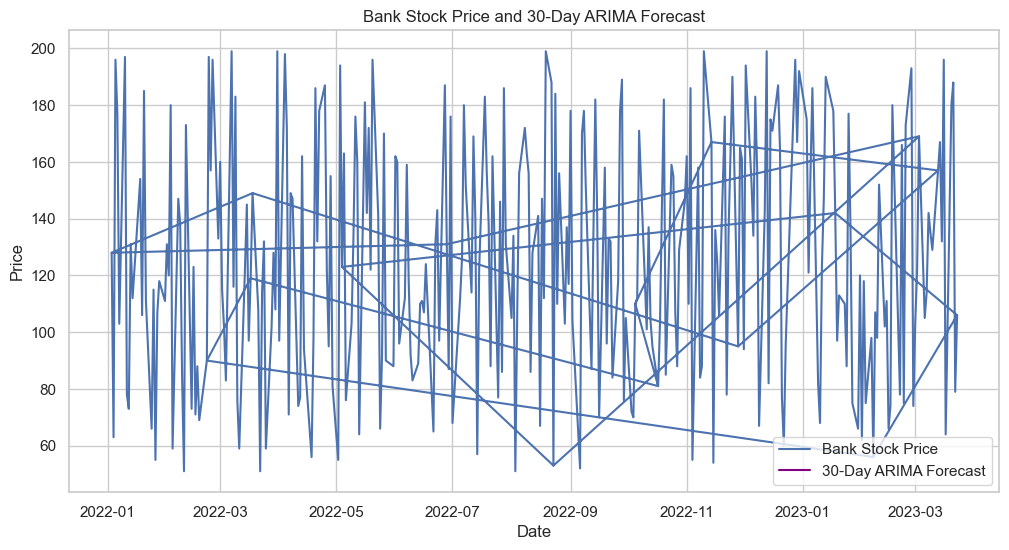

In [74]:
plt.figure(figsize=(12, 6)) # Plot historical data and forecast
plt.plot(merged_df['Date'], merged_df['Bank_Stock_Price'], label='Bank Stock Price')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='30-Day ARIMA Forecast', color='purple')

plt.title("Bank Stock Price and 30-Day ARIMA Forecast") # Add labels and legend
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


The ARIMA forecast provides a model-based prediction for the next 30 days (or any chosen period).
Adjusting parameters (p, d, q) helps fine-tune the model to fit the data patterns.

    ARIMA:
        Suitable for time-series data with complex trends and patterns.
        Can capture seasonality and provide multi-step forecasts, making it useful for financial data.

Each method has its strengths, and combining multiple methods can enhance predictive accuracy. These methods can help inform decision-making based on anticipated trends in the bank's stock price.

# Conclusion

My analysis showed that the myusabank’s stock price had a distinct relationship to the S&P 500, with varying levels of correlation and volatility. Through statistical and visual tools, we identified that the bank's stock generally followed broader market trends, though its sensitivity (beta) and volatility (standard deviation) provided additional context for investment risk.

By combining these methods, we obtained a robust understanding of the myusabank’s stock performance, and these insights could guide investors or stakeholders in making data-driven decisions. Future work could involve incorporating additional market indicators, refining the ARIMA model, or experimenting with machine learning models for potentially higher predictive accuracy. Overall, this project has demonstrated how data analysis and forecasting can provide significant insights into financial data and inform strategic decision-making.